# Gene Expression Data Analysis Project - Solution Notebook

## Project Overview

This notebook provides a **complete Exploratory Data Analysis (EDA)** of a gene expression dataset. The dataset simulates real-world gene expression data with common challenges:

### Dataset Characteristics:
- **Two genes** (`gene1`, `gene2`) with expression values that may contain:
  - **Dropout events** (zeros) - common in single-cell RNA-seq data
  - **Missing values (NaN)** - due to technical failures or quality filtering
  - **Outliers** - extreme expression values
- **Three categorical variables** (`cat1`, `cat2`, `cat3`) representing different sample annotations
- **Hidden population structure** to discover through analysis

- **scipy.stats**: Statistical metrics (skewness, kurtosis)

### EDA Objectives:- **matplotlib**: Plot customization

1. **Data Loading & Inspection**: Understand the structure and dimensions of the data- **seaborn**: Statistical visualization (primary plotting library)

2. **Missing Value Analysis**: Identify and quantify NaN values overall and by categories- **pandas**: Data manipulation and summary statistics

3. **Summary Statistics**: Compute central tendency, dispersion, and distribution shape metrics### Tools Used:

4. **Distribution Visualization**: Histograms to understand gene expression distributions

5. **Categorical Analysis**: Barplots to examine sample distribution across categories7. **Relationship Exploration**: Scatter plots to visualize gene-gene correlations by categories
6. **Comparative Analysis**: Boxplots and violin plots to compare gene expression across groups

## 1. Setup and Data Loading

### What we're doing:

- Import essential libraries for data analysis and visualization- `scipy.stats`: Statistical functions

- Set up consistent styling for all plots using seaborn- `matplotlib.pyplot`: Low-level plot customization

- Load the gene expression dataset from CSV- `seaborn`: Statistical visualization with beautiful defaults

- Get an initial overview of the data shape- `numpy`: Numerical operations

- `pandas`: DataFrame operations and CSV reading
### Libraries:

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

df_analysis = pd.read_csv("gene_expression_data.csv")

# Remove the 'population' column for blind analysis (we'll reveal it later)
print(f"Shape: {df_analysis.shape}")

Shape: (1000, 6)


## 2. Missing Value Analysis (NaN Detection)

### Why check for missing values?

Missing data is common in gene expression datasets due to:- Is the missing data percentage acceptable for analysis (typically <5% is manageable)?

- **Technical dropouts**: Low-abundance transcripts may not be detected- Are NaN values randomly distributed or concentrated in specific categories?

- **Quality filtering**: Poor-quality measurements are often set to NaN### Key Questions:

- **Sample processing issues**: Some samples may have incomplete data

3. **NaN by category**: Check if missing values are distributed unevenly across groups (may indicate systematic bias)

### Analysis Strategy:2. **Percentage calculation**: Proportion of missing data (helps assess data quality)
1. **Overall NaN count**: Total missing values per column

In [84]:
# Check for NaN values overall
print("=== Missing Values (NaN) ===")
print("\nTotal NaN per column:")
print(df_analysis.isna().sum())
print(f"\nTotal NaN in dataset: {df_analysis.isna().sum().sum()}")
print(f"\nPercentage of NaN per column:")
print((df_analysis.isna().sum() / len(df_analysis) * 100).round(2))

=== Missing Values (NaN) ===

Total NaN per column:
gene1         22
gene2         22
cat1           0
cat2           0
cat3           0
population     0
dtype: int64

Total NaN in dataset: 44

Percentage of NaN per column:
gene1         2.2
gene2         2.2
cat1          0.0
cat2          0.0
cat3          0.0
population    0.0
dtype: float64


In [85]:
# Check for NaN values by categories
print("=== NaN by cat1 ===")
print(df_analysis.groupby('cat1')[['gene1', 'gene2']].apply(lambda x: x.isna().sum()))

print("\n=== NaN by cat2 ===")
print(df_analysis.groupby('cat2')[['gene1', 'gene2']].apply(lambda x: x.isna().sum()))

print("\n=== NaN by cat3 ===")
print(df_analysis.groupby('cat3')[['gene1', 'gene2']].apply(lambda x: x.isna().sum()))

=== NaN by cat1 ===
       gene1  gene2
cat1               
TypeA      0      0
TypeB     22     22

=== NaN by cat2 ===
      gene1  gene2
cat2              
G        22     22

=== NaN by cat3 ===
          gene1  gene2
cat3                  
SubtypeA      0      0
SubtypeB     22     22
Unknown       0      0


## 3. Comprehensive Summary Statistics

### Central Tendency Measures:

- **Mean**: Average expression value - sensitive to outliers  - Zero: Similar to normal distribution

- **Median**: Middle value - robust to outliers, useful for skewed distributions  - Negative: Light tails, fewer outliers

- **Mode**: Most frequent value - indicates common expression levels  - Positive: Heavy tails, more outliers than normal

- **Kurtosis**: "Tailedness" of distribution

### Dispersion Measures:  - Zero: Symmetric distribution

- **Standard Deviation (Std)**: Spread around the mean  - Negative skew: Left tail longer (outliers on low end)

- **Variance**: Squared spread (Std²)  - Positive skew: Right tail longer (outliers on high end)

- **Interquartile Range (IQR)**: Range between 25th and 75th percentiles - robust measure of spread- **Skewness**: Asymmetry of distribution

### Distribution Shape:

### Quantiles (Percentiles):

- **Min/Max**: Data range boundaries- **Q3 (75%)**: 75% of data falls below this value

- **Q1 (25%)**: 25% of data falls below this value- **Q2 (50%)**: Median - 50% cutoff

In [86]:
from scipy.stats import kurtosis, skew

# Summary statistics for gene1 and gene2
genes = ['gene1', 'gene2']
summary_stats = pd.DataFrame()

for gene in genes:
    data = df_analysis[gene].dropna()
    summary_stats[gene] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': data.mode().iloc[0] if len(data.mode()) > 0 else np.nan,
        'Std': data.std(),
        'Variance': data.var(),
        'Min': data.min(),
        'Q1 (25%)': data.quantile(0.25),
        'Q2 (50%)': data.quantile(0.50),
        'Q3 (75%)': data.quantile(0.75),
        'Max': data.max(),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }

print("=== Summary Statistics for Gene Expression ===")
summary_stats.T

=== Summary Statistics for Gene Expression ===


,Mean,Median,Mode,Std,Variance,Min,Q1 (25%),Q2 (50%),Q3 (75%),Max,IQR,Skewness,Kurtosis
gene1,9.261309,4.216430,0.0,159.785515,25531.410822,0.0,0.0,4.216430,7.250382,5000.000000,7.250382,31.203895,972.123060
gene2,5.230780,5.352116,0.0,4.214988,17.766122,0.0,0.0,5.352116,9.184924,13.876548,9.184924,0.023856,-1.385119


## 4. Histograms: Gene Expression Distributions

### Purpose:

Histograms reveal the **shape of data distribution** by grouping values into bins and counting observations in each bin.We use `sns.histplot()` for clean, publication-ready histograms with optional KDE overlay.

### Using Seaborn:

### What to look for:

- **Unimodal vs Multimodal**: Single peak suggests one population; multiple peaks may indicate subpopulations- If Mean < Median: Left-skewed (negative skew)

- **Skewness**: Is the distribution symmetric or skewed?- If Mean > Median: Right-skewed (positive skew)

- **Zero inflation**: Gene expression data often has many zeros (dropout)- **Green dashed line**: Median (middle value)

- **Outliers**: Extreme values that appear isolated from main distribution- **Red dashed line**: Mean (average value)

- **Mean vs Median**: When these differ significantly, the distribution is skewed### Interpretation Guide:


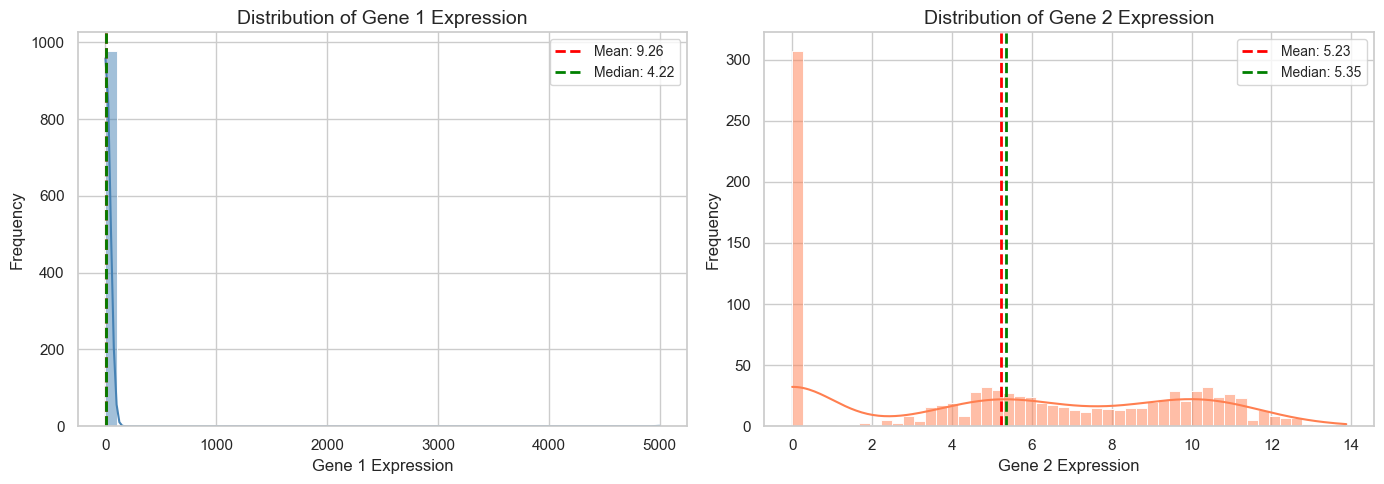

In [87]:
# Histograms of gene1 and gene2 using seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gene1 histogram with KDE
sns.histplot(data=df_analysis, x='gene1', bins=50, kde=True, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].axvline(df_analysis['gene1'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_analysis['gene1'].mean():.2f}")
axes[0].axvline(df_analysis['gene1'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df_analysis['gene1'].median():.2f}")
axes[0].set_xlabel('Gene 1 Expression', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Gene 1 Expression', fontsize=14)
axes[0].legend(fontsize=10)

# Gene2 histogram with KDE
sns.histplot(data=df_analysis, x='gene2', bins=50, kde=True, ax=axes[1], color='coral', edgecolor='white')
axes[1].axvline(df_analysis['gene2'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_analysis['gene2'].mean():.2f}")
axes[1].axvline(df_analysis['gene2'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df_analysis['gene2'].median():.2f}")
axes[1].set_xlabel('Gene 2 Expression', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Gene 2 Expression', fontsize=14)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

## 5. Barplots: Categorical Variable Distributions

### Purpose:

Barplots display **counts or frequencies** for each category, helping us understand:We use `sns.countplot()` which automatically counts observations and creates clean, styled barplots.

- **Sample distribution**: Are categories balanced or imbalanced?### Using Seaborn:

- **Class sizes**: Important for statistical power in group comparisons

- **Potential biases**: Underrepresented categories may affect analysis- **Missing categories**: Empty or very small categories may need special handling

- **Extreme imbalance**: Very small groups may not be statistically reliable

### What to look for:- **Balance**: Ideally, categories should have similar sample sizes for fair comparisons

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/1488729960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analysis, x='cat1', ax=axes[0], palette='Set2', edgecolor='black')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/1488729960.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analysis, x='cat2', ax=axes[1], palette='Set3', edgecolor='black')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/1488729960.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=

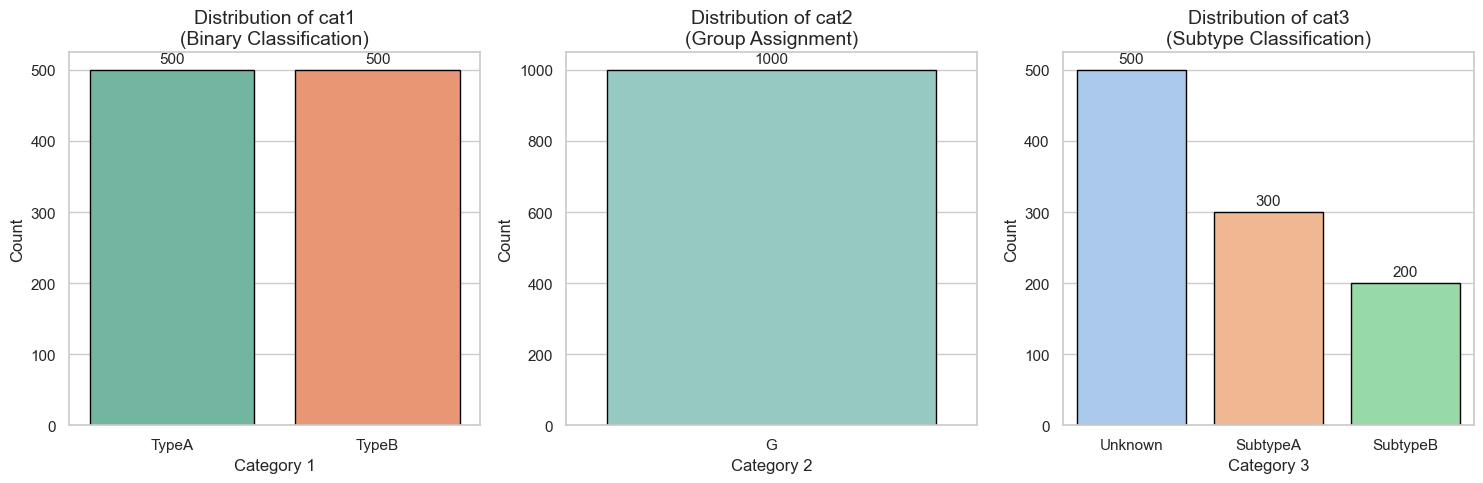

In [88]:
# Barplots for categorical variables using seaborn countplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# cat1 - Binary categorical variable
sns.countplot(data=df_analysis, x='cat1', ax=axes[0], palette='Set2', edgecolor='black')
axes[0].set_xlabel('Category 1', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of cat1\n(Binary Classification)', fontsize=14)
# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=11, padding=3)

# cat2 - Binary categorical variable
sns.countplot(data=df_analysis, x='cat2', ax=axes[1], palette='Set3', edgecolor='black')
axes[1].set_xlabel('Category 2', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Distribution of cat2\n(Group Assignment)', fontsize=14)
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=11, padding=3)

# cat3 - Three-level categorical variable
sns.countplot(data=df_analysis, x='cat3', ax=axes[2], palette='pastel', edgecolor='black')
axes[2].set_xlabel('Category 3', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_title('Distribution of cat3\n(Subtype Classification)', fontsize=14)
for container in axes[2].containers:
    axes[2].bar_label(container, fontsize=11, padding=3)

plt.tight_layout()
plt.show()

## 6. Boxplots: Comparing Gene Expression Across Categories

### Purpose:

Boxplots provide a **5-number summary** of data distribution for each group:- Comparing `cat1`, `cat2`, and `cat3` helps identify which categorization best explains expression differences

- **Box**: Interquartile range (IQR) - middle 50% of data- Many outliers in one direction suggests skewed data

- **Line inside box**: Median (Q2)- If boxes don't overlap much, groups likely have different distributions

- **Whiskers**: Extend to 1.5×IQR from the box### Interpretation:

- **Points beyond whiskers**: Potential outliers

- **Outliers**: Points beyond whiskers may need investigation

### What to look for:- **Overlapping boxes**: Groups may not be significantly different

- **Median differences**: Boxes at different heights indicate different central tendencies- **Box sizes**: Wider boxes = more variability within the group

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/2801652175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat1', y='gene1', ax=axes[0], palette='Set2')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/2801652175.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat1', y='gene2', ax=axes[1], palette='Set2')


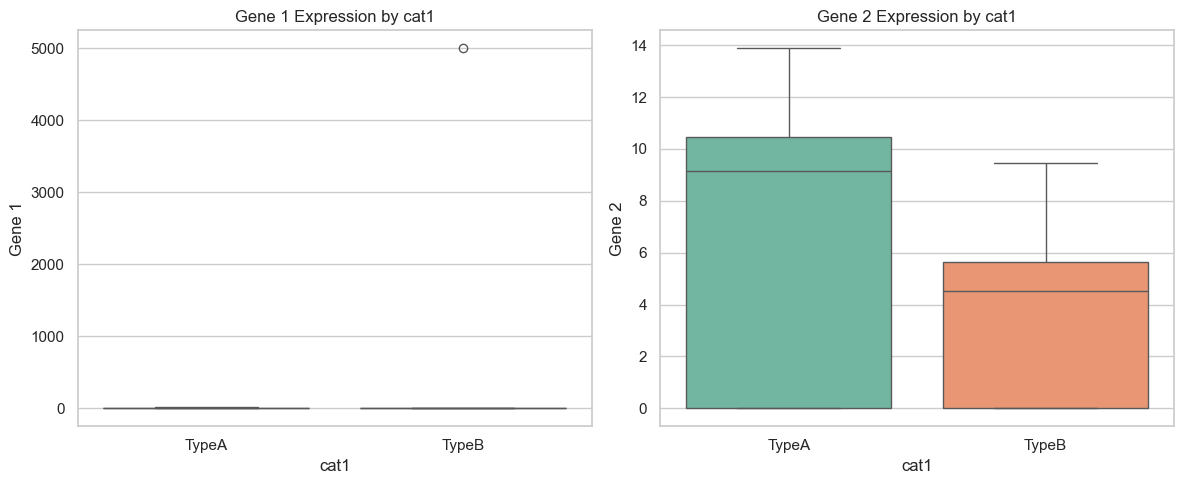

In [89]:
# Boxplots by cat1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_analysis, x='cat1', y='gene1', ax=axes[0], palette='Set2')
axes[0].set_title('Gene 1 Expression by cat1')
axes[0].set_xlabel('cat1')
axes[0].set_ylabel('Gene 1')

sns.boxplot(data=df_analysis, x='cat1', y='gene2', ax=axes[1], palette='Set2')
axes[1].set_title('Gene 2 Expression by cat1')
axes[1].set_xlabel('cat1')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/135155867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat2', y='gene1', ax=axes[0], palette='Set3')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/135155867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat2', y='gene2', ax=axes[1], palette='Set3')


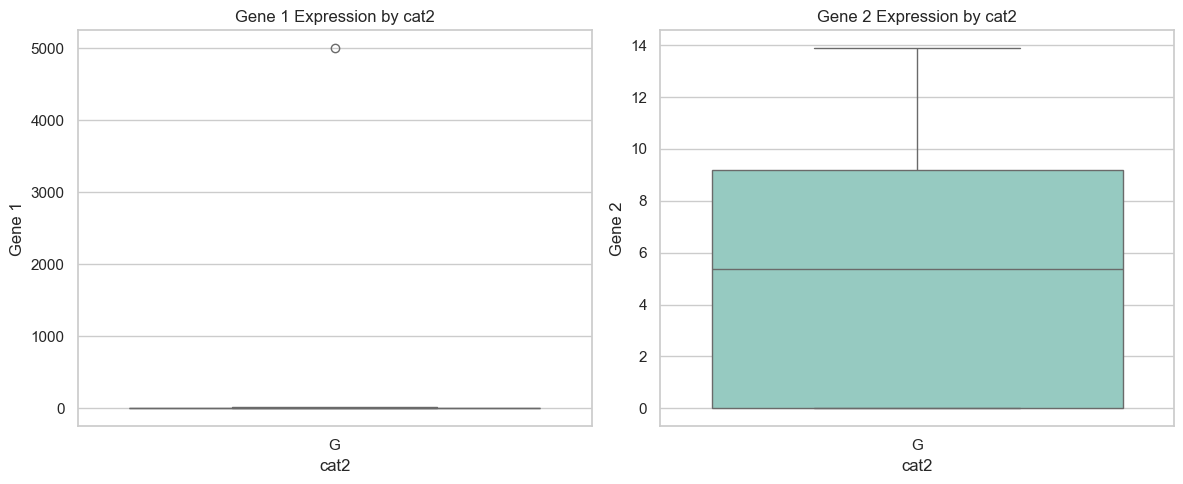

In [90]:
# Boxplots by cat2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_analysis, x='cat2', y='gene1', ax=axes[0], palette='Set3')
axes[0].set_title('Gene 1 Expression by cat2')
axes[0].set_xlabel('cat2')
axes[0].set_ylabel('Gene 1')

sns.boxplot(data=df_analysis, x='cat2', y='gene2', ax=axes[1], palette='Set3')
axes[1].set_title('Gene 2 Expression by cat2')
axes[1].set_xlabel('cat2')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/1088025156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat3', y='gene1', ax=axes[0], palette='pastel')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/1088025156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x='cat3', y='gene2', ax=axes[1], palette='pastel')


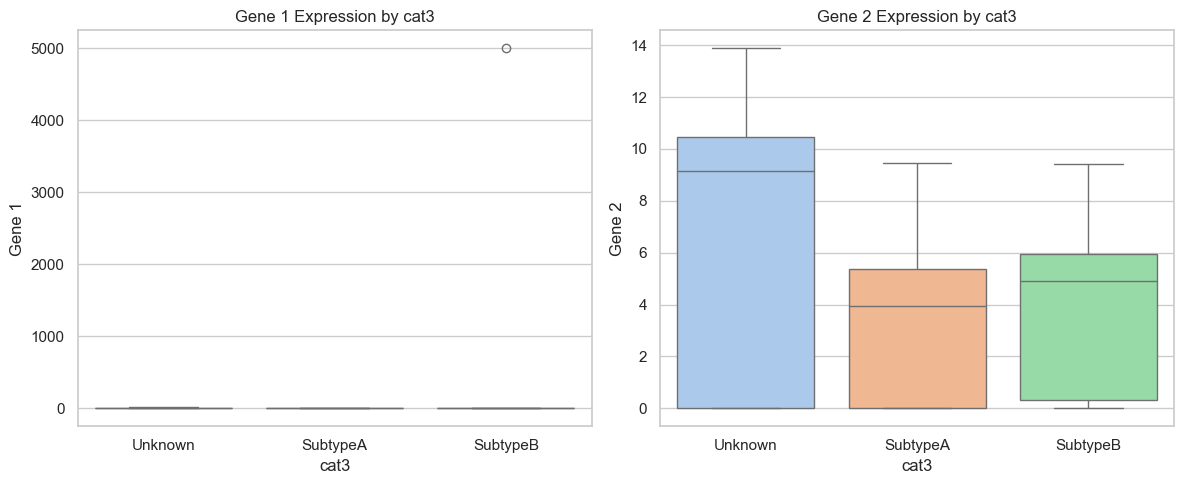

In [91]:
# Boxplots by cat3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_analysis, x='cat3', y='gene1', ax=axes[0], palette='pastel')
axes[0].set_title('Gene 1 Expression by cat3')
axes[0].set_xlabel('cat3')
axes[0].set_ylabel('Gene 1')

sns.boxplot(data=df_analysis, x='cat3', y='gene2', ax=axes[1], palette='pastel')
axes[1].set_title('Gene 2 Expression by cat3')
axes[1].set_xlabel('cat3')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

## 7. Violin Plots: Full Distribution Visualization by Categories

### Purpose:

Violin plots combine **boxplots** with **kernel density estimation (KDE)** to show:`sns.violinplot()` with `inner='box'` shows both the distribution shape and quartile summary.

- The full **shape of the distribution** (not just summary statistics)### Using Seaborn:

- **Multimodality**: Multiple peaks indicate subpopulations within a category

- **Density**: Wider sections = more observations at that value- **Inner box**: Shows the same info as a traditional boxplot

- **Different violin widths**: Varying sample sizes across categories

### Advantages over Boxplots:- **Asymmetric violins**: Indicate skewed distributions

- Reveal **distribution shape** that boxplots hide- **Multiple bumps**: Suggests hidden subgroups within a category

- Show **bimodal or multimodal** distributions clearly### What to look for:

- Better for comparing **asymmetric** distributions

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/3563915742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat1', y='gene1', ax=axes[0], palette='Set2', inner='box')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/3563915742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat1', y='gene2', ax=axes[1], palette='Set2', inner='box')


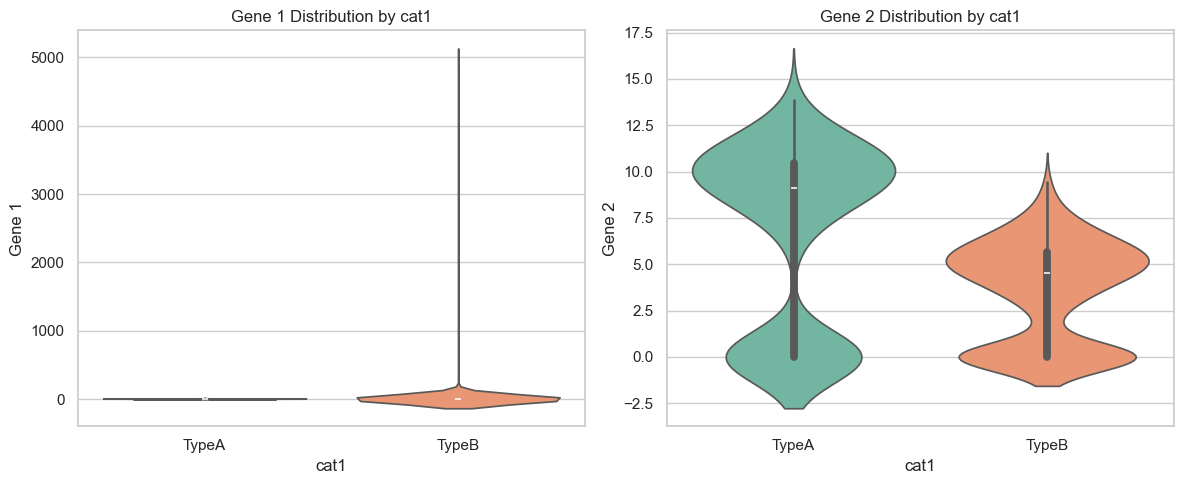

In [92]:
# Violin plots by cat1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=df_analysis, x='cat1', y='gene1', ax=axes[0], palette='Set2', inner='box')
axes[0].set_title('Gene 1 Distribution by cat1')
axes[0].set_xlabel('cat1')
axes[0].set_ylabel('Gene 1')

sns.violinplot(data=df_analysis, x='cat1', y='gene2', ax=axes[1], palette='Set2', inner='box')
axes[1].set_title('Gene 2 Distribution by cat1')
axes[1].set_xlabel('cat1')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/2041749368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat2', y='gene1', ax=axes[0], palette='Set3', inner='box')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/2041749368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat2', y='gene2', ax=axes[1], palette='Set3', inner='box')


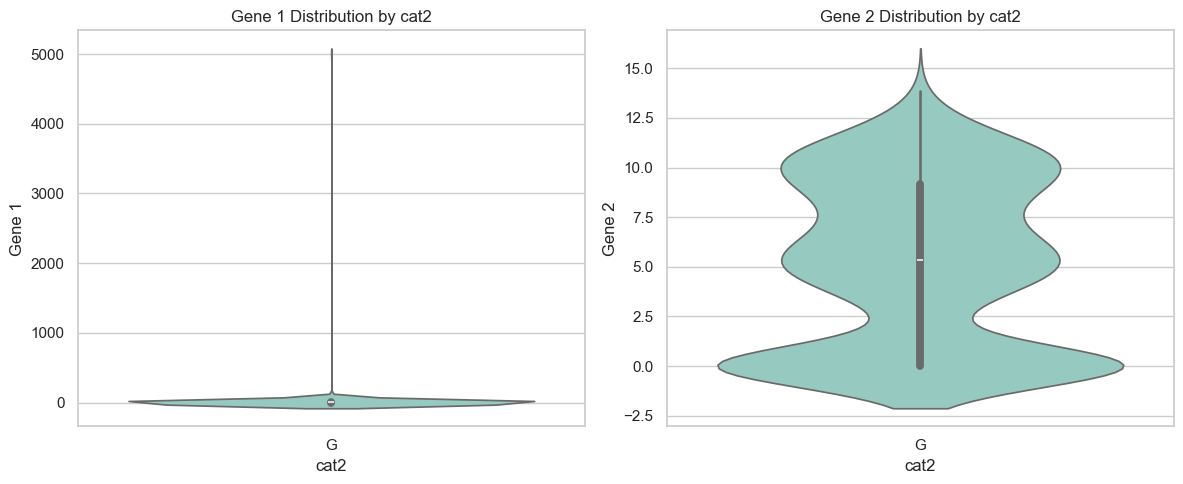

In [93]:
# Violin plots by cat2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=df_analysis, x='cat2', y='gene1', ax=axes[0], palette='Set3', inner='box')
axes[0].set_title('Gene 1 Distribution by cat2')
axes[0].set_xlabel('cat2')
axes[0].set_ylabel('Gene 1')

sns.violinplot(data=df_analysis, x='cat2', y='gene2', ax=axes[1], palette='Set3', inner='box')
axes[1].set_title('Gene 2 Distribution by cat2')
axes[1].set_xlabel('cat2')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/4100552253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat3', y='gene1', ax=axes[0], palette='pastel', inner='box')
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_35537/4100552253.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='cat3', y='gene2', ax=axes[1], palette='pastel', inner='box')


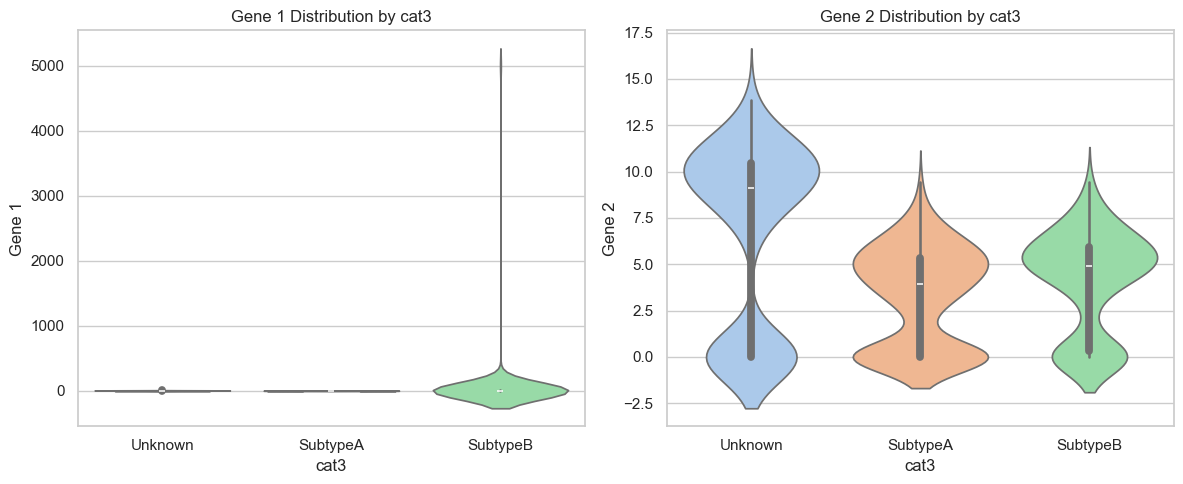

In [94]:
# Violin plots by cat3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=df_analysis, x='cat3', y='gene1', ax=axes[0], palette='pastel', inner='box')
axes[0].set_title('Gene 1 Distribution by cat3')
axes[0].set_xlabel('cat3')
axes[0].set_ylabel('Gene 1')

sns.violinplot(data=df_analysis, x='cat3', y='gene2', ax=axes[1], palette='pastel', inner='box')
axes[1].set_title('Gene 2 Distribution by cat3')
axes[1].set_xlabel('cat3')
axes[1].set_ylabel('Gene 2')

plt.tight_layout()
plt.show()

## 8. Scatter Plots: Gene-Gene Relationships by Categories

### Purpose:

Scatter plots reveal the **relationship between two continuous variables** (gene1 vs gene2) while using color to encode categorical information.`sns.scatterplot()` with `hue` parameter creates elegant, color-coded scatter plots with automatic legends.

### Using Seaborn:

### What to look for:

- **Correlation**: Positive slope = genes co-expressed; negative slope = inverse relationship- **Linear trend within clusters**: Strong gene-gene correlation for that group

- **Clusters**: Separate point clouds may indicate distinct populations- **Mixed colors**: Category doesn't explain gene expression patterns well

- **Color separation**: If colors cluster together, the category explains gene expression patterns- **Well-separated color clusters**: Category strongly relates to gene expression

- **Outliers**: Isolated points far from the main cloud deserve investigation### Interpretation Guide:



### Key Questions to Answer:4. Are there samples that don't fit the expected pattern?

1. Are gene1 and gene2 correlated overall?3. Do any categories form distinct clusters in gene expression space?
2. Does the correlation differ by category?

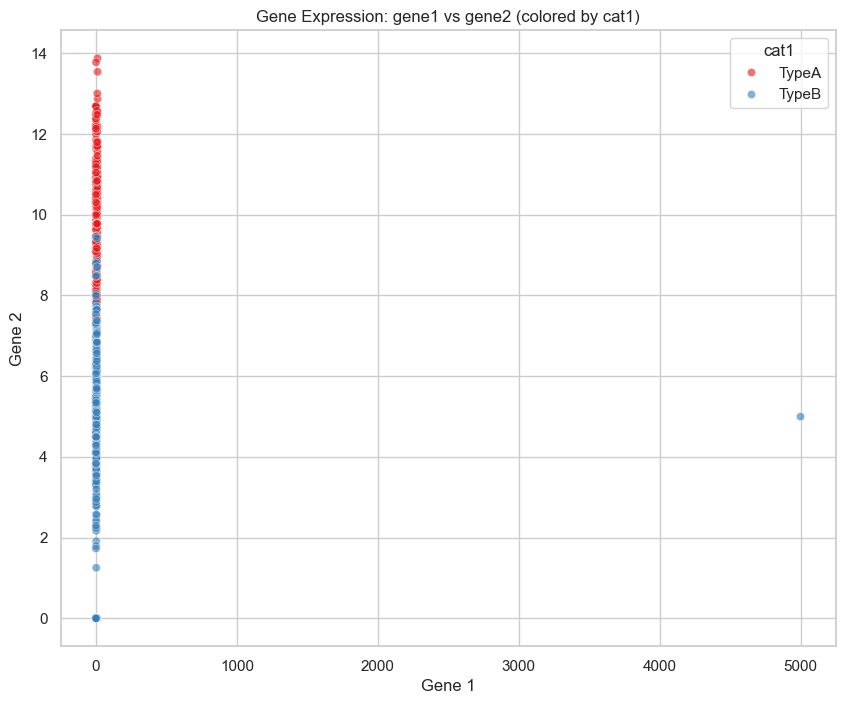

In [95]:
# Scatter plot colored by cat1
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_analysis, x='gene1', y='gene2', hue='cat1', palette='Set1', alpha=0.6)
plt.title('Gene Expression: gene1 vs gene2 (colored by cat1)')
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.legend(title='cat1')
plt.show()

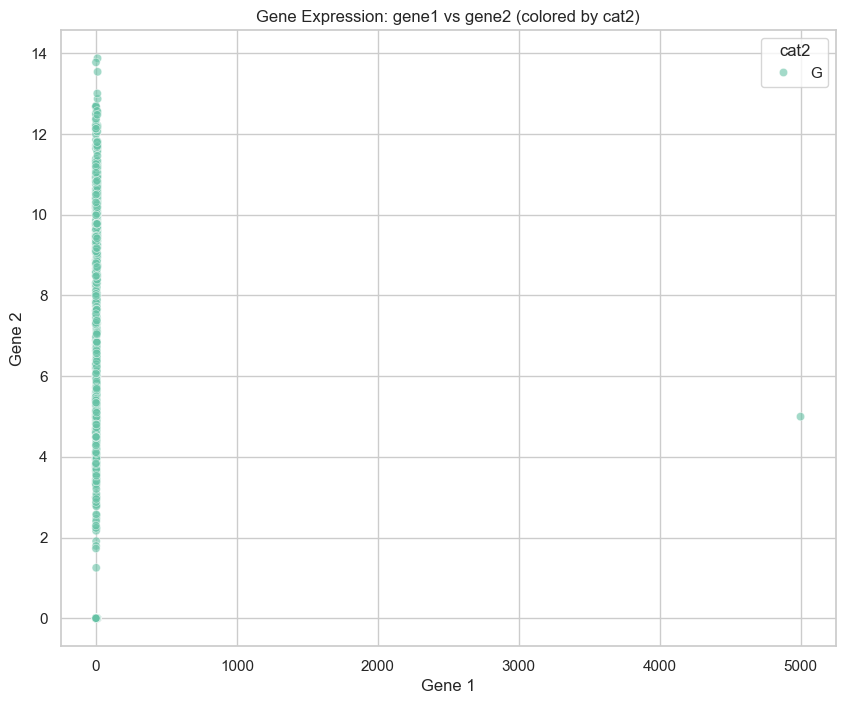

In [96]:
# Scatter plot colored by cat2
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_analysis, x='gene1', y='gene2', hue='cat2', palette='Set2', alpha=0.6)
plt.title('Gene Expression: gene1 vs gene2 (colored by cat2)')
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.legend(title='cat2')
plt.show()

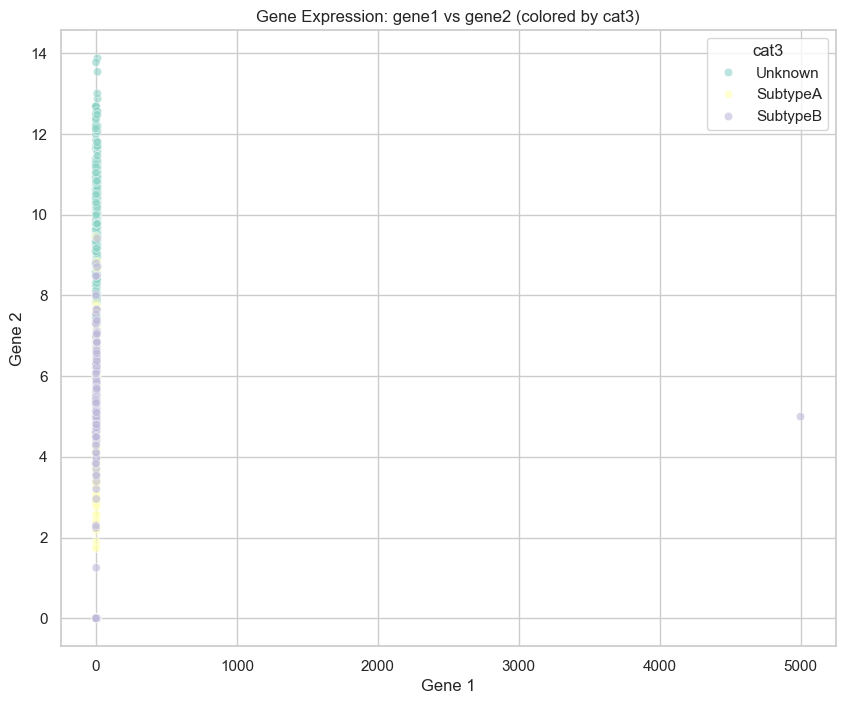

In [97]:
# Scatter plot colored by cat3
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_analysis, x='gene1', y='gene2', hue='cat3', palette='Set3', alpha=0.6)
plt.title('Gene Expression: gene1 vs gene2 (colored by cat3)')
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.legend(title='cat3')
plt.show()

### Pairplot: All Relationships at Once

Seaborn's `pairplot()` creates a matrix of plots showing:
- **Diagonal**: Distribution of each variable (histogram/KDE)
- **Off-diagonal**: Scatter plots for each pair of variables
- **Hue coloring**: Shows how categories relate to all variables simultaneously

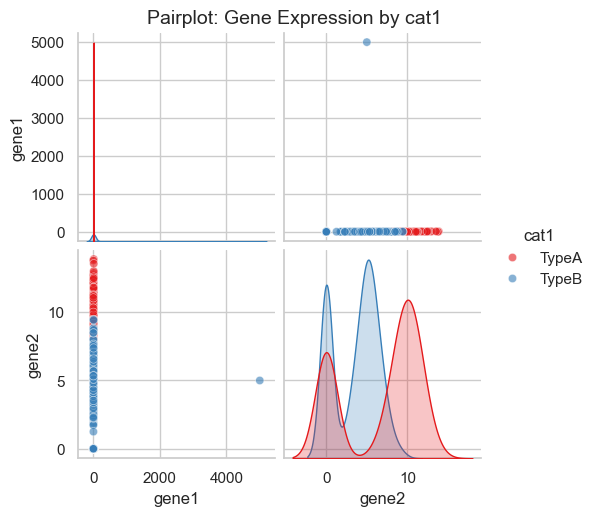

In [98]:
# Pairplot colored by cat1 - shows gene distributions and relationships
sns.pairplot(df_analysis[['gene1', 'gene2', 'cat1']].dropna(), 
             hue='cat1', palette='Set1', 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Gene Expression by cat1', y=1.02, fontsize=14)
plt.show()

## 9. Heatmaps: Relationships Between Categorical Variables

### Purpose:
Heatmaps visualize **cross-tabulations (contingency tables)** between categorical variables, revealing:
- **Co-occurrence patterns**: How categories from different variables relate to each other
- **Conditional distributions**: Given one category, which other categories are most common?
- **Hidden structure**: Relationships that might indicate underlying population structure

### Creating Cross-tabulations:
- **`pd.crosstab()`**: Creates a frequency table counting observations for each combination
- **Normalization**: Use `normalize='index'` (row), `normalize='columns'`, or `normalize='all'`

### What to look for:
- **Diagonal patterns**: Strong diagonal suggests categories are aligned
- **Uniform distribution**: Categories are independent (no relationship)
- **Concentrated cells**: Strong association between specific categories
- **Row/column totals**: Imbalanced marginal distributions

### Using Seaborn:
`sns.heatmap()` with `annot=True` displays values in each cell, making patterns easy to interpret.

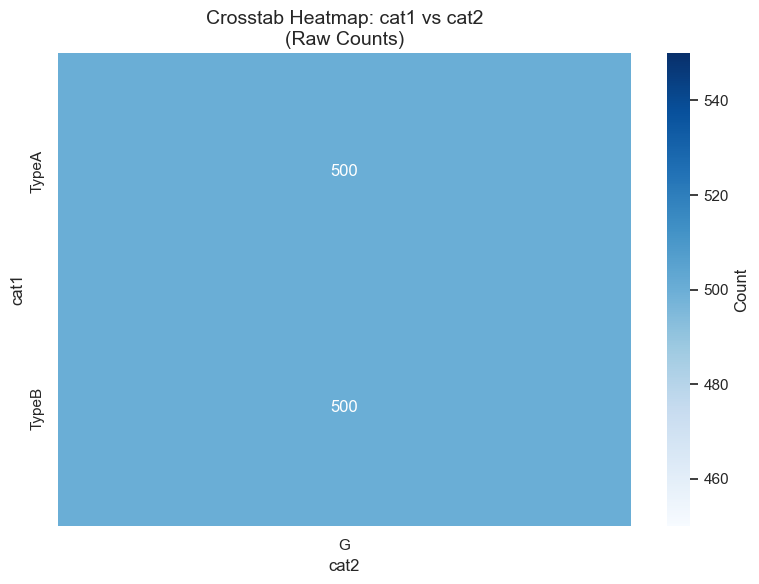

Interpretation: Each cell shows how many samples belong to both categories.


In [99]:
# Cross-tabulation: cat1 vs cat2
crosstab_1_2 = pd.crosstab(df_analysis['cat1'], df_analysis['cat2'])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_1_2, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Crosstab Heatmap: cat1 vs cat2\n(Raw Counts)', fontsize=14)
plt.xlabel('cat2', fontsize=12)
plt.ylabel('cat1', fontsize=12)
plt.tight_layout()
plt.show()

print("Interpretation: Each cell shows how many samples belong to both categories.")

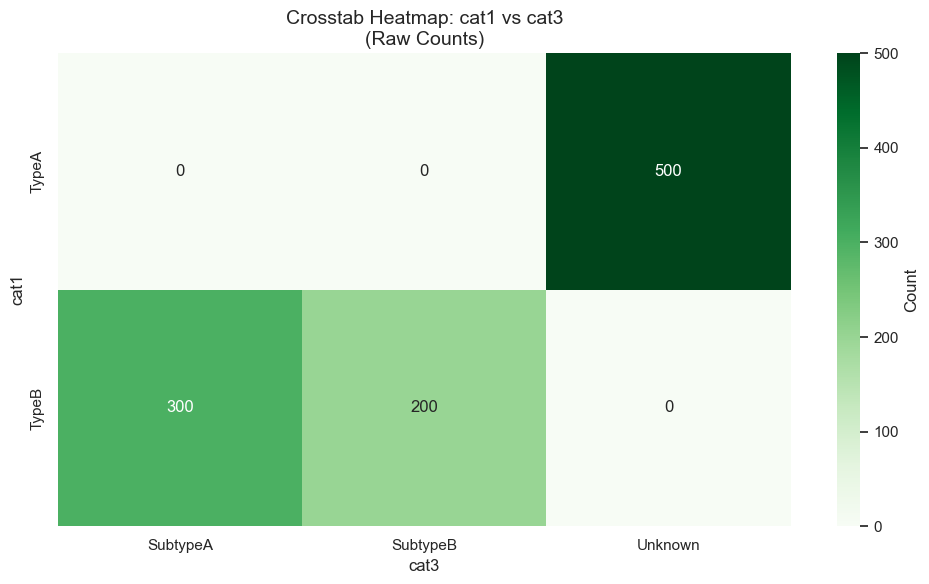

In [100]:
# Cross-tabulation: cat1 vs cat3
crosstab_1_3 = pd.crosstab(df_analysis['cat1'], df_analysis['cat3'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_1_3, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Crosstab Heatmap: cat1 vs cat3\n(Raw Counts)', fontsize=14)
plt.xlabel('cat3', fontsize=12)
plt.ylabel('cat1', fontsize=12)
plt.tight_layout()
plt.show()

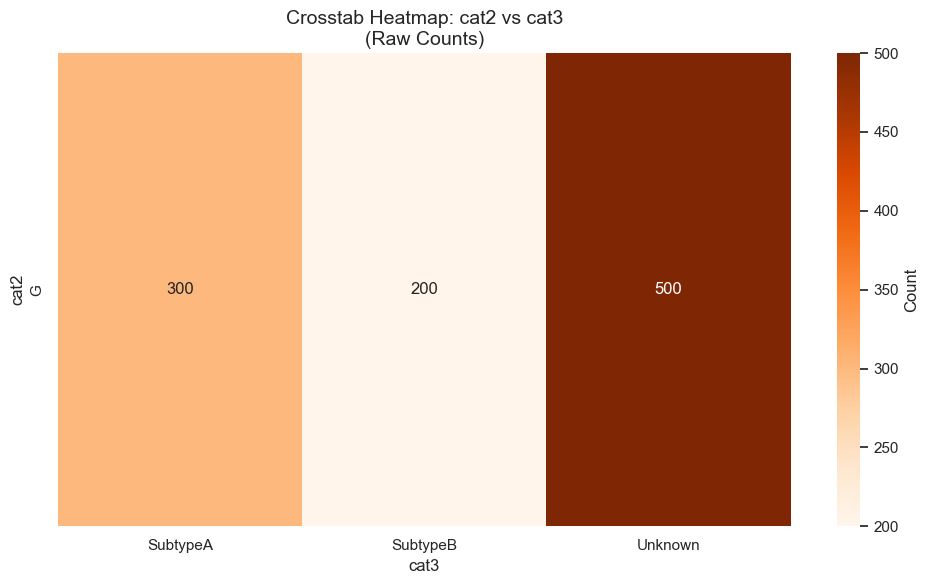

In [101]:
# Cross-tabulation: cat2 vs cat3
crosstab_2_3 = pd.crosstab(df_analysis['cat2'], df_analysis['cat3'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_2_3, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Crosstab Heatmap: cat2 vs cat3\n(Raw Counts)', fontsize=14)
plt.xlabel('cat3', fontsize=12)
plt.ylabel('cat2', fontsize=12)
plt.tight_layout()
plt.show()

### Normalized Heatmaps (Proportions)

Normalizing by rows or columns helps interpret **conditional probabilities**:
- **`normalize='index'`**: Each row sums to 1 → "Given cat1, what's the distribution of cat3?"
- **`normalize='columns'`**: Each column sums to 1 → "Given cat3, what's the distribution of cat1?"

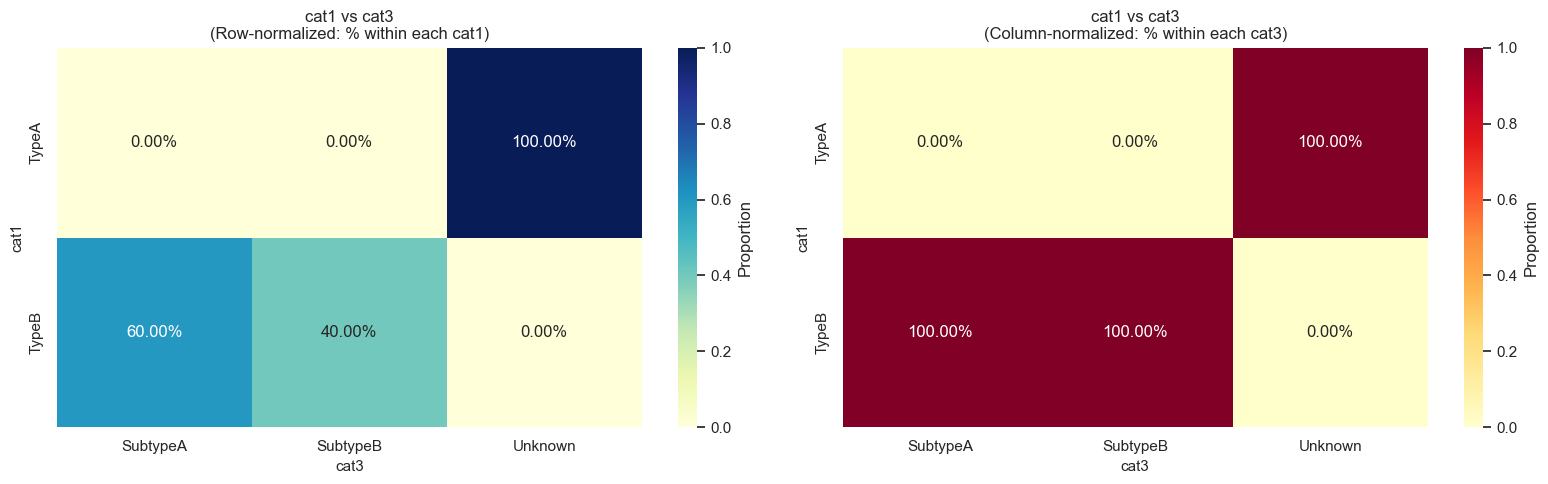

Left: 'Given TypeA, what % are Unknown/SubtypeA/SubtypeB?'
Right: 'Given SubtypeA, what % are TypeA/TypeB?'


In [102]:
# Normalized crosstab: cat1 vs cat3 (row-normalized)
crosstab_normalized = pd.crosstab(df_analysis['cat1'], df_analysis['cat3'], normalize='index')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Row-normalized (by cat1)
sns.heatmap(crosstab_normalized, annot=True, fmt='.2%', cmap='YlGnBu', ax=axes[0], 
            cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[0].set_title('cat1 vs cat3\n(Row-normalized: % within each cat1)', fontsize=12)
axes[0].set_xlabel('cat3', fontsize=11)
axes[0].set_ylabel('cat1', fontsize=11)

# Column-normalized (by cat3)
crosstab_col_norm = pd.crosstab(df_analysis['cat1'], df_analysis['cat3'], normalize='columns')
sns.heatmap(crosstab_col_norm, annot=True, fmt='.2%', cmap='YlOrRd', ax=axes[1],
            cbar_kws={'label': 'Proportion'}, vmin=0, vmax=1)
axes[1].set_title('cat1 vs cat3\n(Column-normalized: % within each cat3)', fontsize=12)
axes[1].set_xlabel('cat3', fontsize=11)
axes[1].set_ylabel('cat1', fontsize=11)

plt.tight_layout()
plt.show()

print("Left: 'Given TypeA, what % are Unknown/SubtypeA/SubtypeB?'")
print("Right: 'Given SubtypeA, what % are TypeA/TypeB?'")

## 10. EDA Summary and Key Findings

### Data Quality Assessment:
- **Missing Values (NaN)**: Identified and quantified by category - NaN values may be concentrated in specific subgroups (check cat3 for SubtypeB which has high dropout)
- **Outliers**: Gene1 shows extreme outlier values visible in histograms and boxplots
- **Zero Inflation**: High proportion of zero values due to gene expression dropout

### Distribution Characteristics:
- **Gene1**: Right-skewed distribution with outliers; mean > median indicates positive skewness
- **Gene2**: Similar pattern but potentially less extreme outliers
- **Bimodality**: Histograms may show multiple peaks suggesting hidden subpopulations

### Categorical Patterns:
- **cat1 (TypeA/TypeB)**: Clear separation in gene expression - TypeA shows higher expression
- **cat2 (GroupX/GroupY)**: Less clear separation - groups may be mixed across populations
- **cat3 (Subtypes)**: Three distinct groups with Unknown showing highest expression

### Categorical Relationships (from Heatmaps):
- **cat1 vs cat3**: Strong association - TypeA maps to Unknown, TypeB maps to SubtypeA/SubtypeB
- **cat2 vs cat3**: SubtypeB is predominantly GroupY
- These patterns suggest hidden population structure

### Gene Correlation:
- Strong positive correlation between gene1 and gene2 (visible in scatter plots)
- Correlation pattern differs by category - some groups show tighter clustering

### Next Steps for Analysis:
1. **Statistical Testing**: Perform t-tests/ANOVA to quantify significance of group differences
2. **Outlier Treatment**: Decide whether to remove, winsorize, or keep outliers
3. **Missing Data Handling**: Imputation or exclusion strategy for NaN values
4. **Population Discovery**: Use clustering to identify hidden population structure